# Comparison of statoliths pile avalanche dynamic and the gravitropic response to transient stimulus

## Load python modules

In [1]:
%matplotlib inline
from pylab import *
import pandas as pd

mpl.rcParams['font.size'] = 18
mpl.rcParams['text.usetex'] =True
mpl.rcParams['figure.figsize']=[9,4]

data_folder = './data/Figure7/'

## Load data

In [2]:
#For 3g transient experiments
data3g = pd.read_csv(data_folder+'gravitropic_response_3g.csv', index_col=0)
s1 = data3g[ data3g.sequence == 1 ] #use the first sequence for in experiments
s1m = s1.groupby(s1['temps_expo_(min)']).mean() #group by exposure time and take the mean
expo = s1['temps_expo_(min)'].unique() #get the exposure time

#For 1g transient experiments
data1g = pd.read_csv(data_folder+'gravitropic_response_1g.csv', index_col=0)

#Compute mean growth and radius
pix2cmgravi = 132/2.5 #length scale for 3g data
DL=0.197 #length scale for 1g data
DLDTmoy = mean( (s1['DLDT_moy_(pixel/min)'].mean()/pix2cmgravi *10**1, data1g['dldt_pix/min'].mean()*DL ) )
Rmoy = s1['Rayon_(pixel)'].mean()/pix2cmgravi*10**1

#Data of gravitropic sensitivity for permanent stimulus from chauvet et al. 2016 Scientific reports
Bble = 0.7
Bble_std = 0.17

#Data from the theoretical model
data_model = pd.read_csv(data_folder+'data_model_transient.csv', index_col=0)

#Statoliths pile avalanche angle for 70°-1g  data
data1gs = pd.read_csv(data_folder+'Statolith_avalanche_dynamic_1g_70deg.csv', index_col=0)
t1g, A1g, std1g = array(data1gs['time_(mn)']), array(data1gs['mean_angle_(deg)']),  array(data1gs['std_angle_(deg)'])

#Statoliths pile avalanche angle for 70°-3g  data
d3g = pd.read_csv(data_folder+'Statolith_avalanche_dynamic_3g_70deg.csv', index_col=0)
end_angle3g = d3g['mean_angle_(deg)'][d3g['mean_angle_(deg)'].notnull()][-20:].mean()
t3g, A3g, std3g = array(d3g['time_(mn)']), array(d3g['mean_angle_(deg)']),  array(d3g['std_angle_(deg)'])

# Plot on the same figure the gravitropic response to transient stimulus and statoliths pile avalanche dynamic


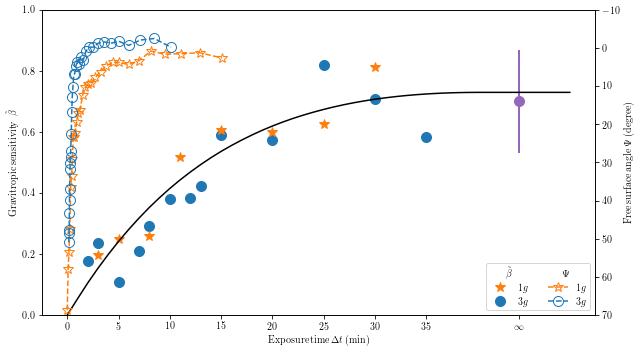

In [4]:
figure(figsize=(9,5))
MS = 10
ax1 = gca()

line1, = plot(s1m.index,  
              1/sin(deg2rad(45)) *  Rmoy * deg2rad(s1m['DADT_moy_(deg/min)'])/DLDTmoy,
              'C0o', ms=MS, label="$3g$")

line2, = plot(data1g.expo,  
              1/sin(deg2rad(45)) * Rmoy * deg2rad(data1g['dadt_(deg/min)'])/DLDTmoy,
              'C1*', ms=MS, label="$1g$")

plot(data_model.DT, data_model.Beta,'k')

ylim(0,1.)
ylabel(r'$\mathrm{Gravitropic\, sensitivity}$\, $\tilde{\beta}$',ma='center')
xlabel(r'$\mathrm{Exposure\, time}\, \Delta t \, \mathrm{(min)}$ ')
errorbar(44, Bble, yerr=Bble_std, clip_on=False, fmt='C4o', lw=2, ms=MS)

xticks([0,5,10,15,20,25,30,35,44], ['$0$','$5$','$10$','$15$','$20$','$25$','$30$','$35$',r'$\infty$'])
xlim(0,44)

ax2 = ax1.twinx()

goff = 1.0
toff = 0.15
Npts = 50
idecim1g = unique( logspace(-1,log10(len(A1g)-1), Npts,dtype='int') )
line3, = ax2.plot(t1g[idecim1g], A1g[idecim1g], 'C1*--',
        lw=1.5, fillstyle='none', ms=MS)

idecim = unique( logspace(-1,log10(len(A3g)-3), Npts, dtype='int') )
line4, = ax2.plot( (t3g[idecim])*goff+toff, A3g[idecim]-end_angle3g, 'C0o--',
        lw=1.5, fillstyle='none', ms=MS)


ax2.set_ylabel(r'$\rm{Free\, surface\, angle}\; \Psi\, (\rm{degree})$')

ax2.set_ylim(70,-10)
ax2.set_yticks( (60,40,20,0),(r'$60$',r'$40$',r'$20$',r'$0$'))


leg = ax1.legend((line2,line1, line3, line4), ('$1g$','$3g$','$1g$','$3g$'), loc='lower right', 
                 frameon=True, ncol=2,title=r'$\tilde{\beta} \qquad\qquad\quad \Psi$')

tight_layout()
